In [4]:

import chart_studio.plotly as py
import chart_studio
username = '' # your username
api_key = '' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

def read_HSI():
  X = loadmat('..\Datasets\IndianPines\Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('..\Datasets\IndianPines\Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

lines_path = '..\\result\\lines\\'
if not os.path.exists(lines_path):
  os.makedirs(lines_path)


X shape: (145, 145, 200)
y shape: (145, 145)


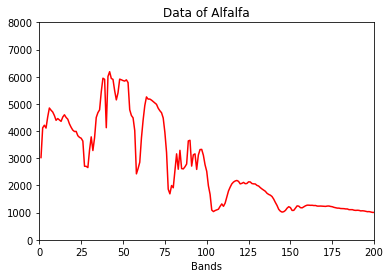

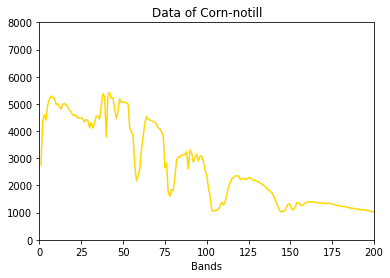

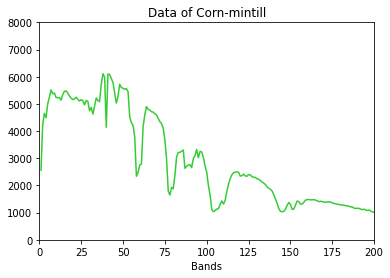

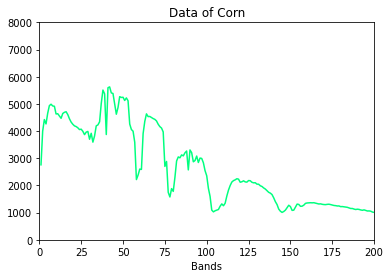

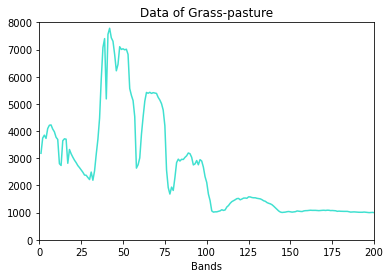

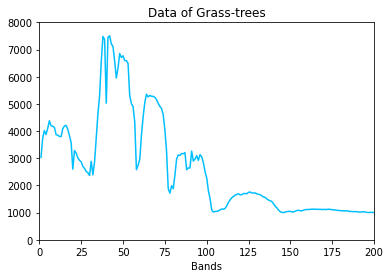

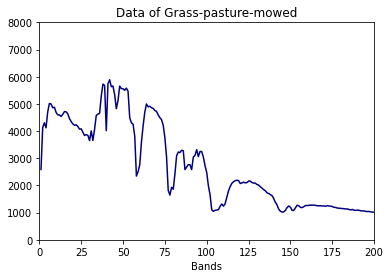

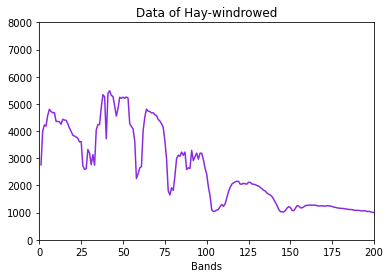

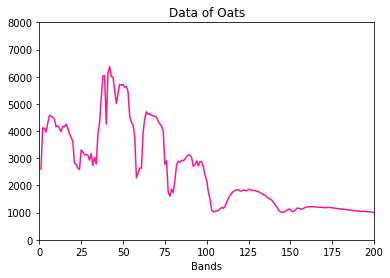

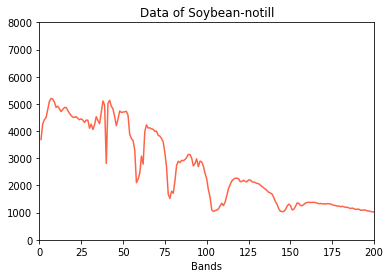

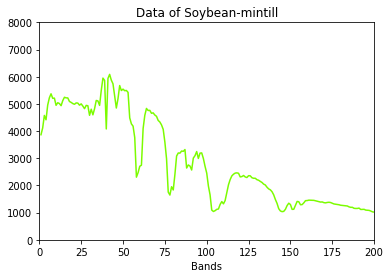

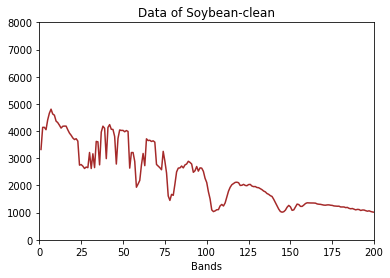

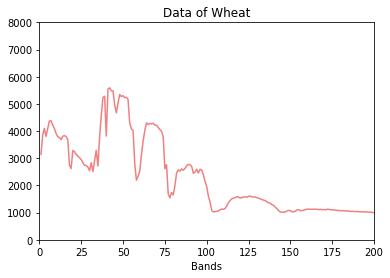

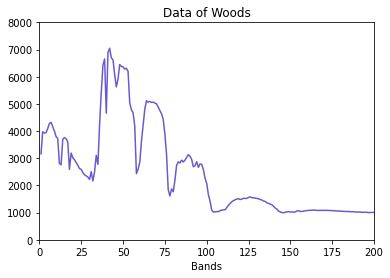

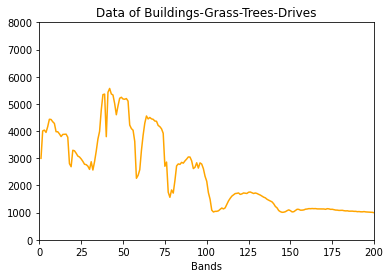

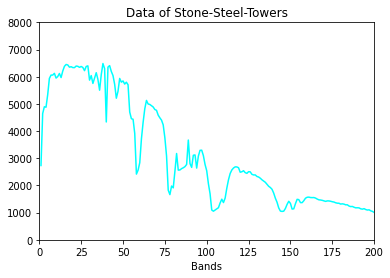

In [7]:
#绘制各个折线图
import random as rm
class_labels = {'1': 'Alfalfa'	,
    '2'	:'Corn-notill'	,
    '3'	:'Corn-mintill'	,
    '4'	:'Corn'	,
    '5'	:'Grass-pasture'	,
    '6'	: 'Grass-trees'	,
    '7'	:'Grass-pasture-mowed'	,
    '8'	:'Hay-windrowed'	,
    '9'	:'Oats'    ,
    '10': 'Soybean-notill'	,
    '11': 'Soybean-mintill'	,
    '12': 'Soybean-clean'	,
    '13': 'Wheat'	,
    '14': 'Woods'	,
    '15': 'Buildings-Grass-Trees-Drives'	,
    '16': 'Stone-Steel-Towers'	
    }
list_color = ['red','gold','limegreen','springgreen','turquoise',"deepskyblue",\
              'navy','blueviolet','deeppink','tomato','lawngreen','brown',\
                'lightcoral','slateblue','orange','aqua']
X, y = read_HSI()
X.astype(  "float32")
y.astype(  "float32")
classes = [0]*17
classnum = [0]*17
m, n, p = X.shape
X = np.reshape(X, (m * n , p))
y = y.reshape(m * n)

for i in range(m*n):
  if (type(classes[y[i]]) == int):
    classes[y[i]] = [X[i]]
  classes[y[i]].append(X[i])
  classnum[y[i]] += 1

bands = np.arange(1,201)

for i in range(len(classes)-1):
  plt.figure(i+1)
  plt.title('Data of ' + class_labels[str(i+1)])
  plt.xlim(0,200)
  plt.ylim(0,8000)
  plt.xlabel('Bands')
  plt.plot(bands,rm.choice(classes[i+1]),'-',color = list_color[i])
  plt.savefig("../result/lines/example_of_" + class_labels[str(i+1)] + ".png")


In [13]:
#绘制多折线动态图
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.offline as po
import plotly.io as pio


X, y = read_HSI()

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  return df
  
df = extract_pixels(X, y)

df.head()

df.info()

df.iloc[:, :-1].describe()

sample_size = 1
sample = df.groupby('class').apply(lambda x: x.sample(sample_size))
sample = sample.T
sample.columns = [i for i in range(17)]
sample = sample.drop(columns = 0)
sample = sample.drop('class')
sample.columns = [class_labels[str(i+1)] for i in range(16)]


fig = go.Figure()
for i in range(0,16):

  fig.add_scatter(x=sample.index, y=sample[class_labels[str(i+1)]],name = class_labels[str(i+1)])
fig.update_layout(title = "Datas of all bands")
fig.show()

#po.plot(fig)#,filename = './results/lines/all_line.html')


X shape: (145, 145, 200)
y shape: (145, 145)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [12]:
#绘制三维散点图
from preprocess import *
from utils import *
from pandas import DataFrame
dataset = "IndianPines"
preprocesses = ['pca', 'ica','lda']
hsi_img, gt, label_values, ignored_labels ,rgb_bands = load_dataset(dataset)

for i in range(len(preprocesses)):
    img = preprocess(hsi_img, gt, preprocess_name=preprocesses[i], n_bands=3)
    img_merge = np.concatenate((img, gt[:,:,None]), axis=2)
    m, n, p = img_merge.shape
    img_data = np.reshape(img_merge, (m * n, p))
    img_frame = DataFrame(img_data,index=None,columns = ["PC-1","PC-2","PC-3",'class'])
    img_frame['class'] = img_frame['class'].map(lambda x: int(x))
    sample_size = 20
    sample = img_frame.groupby('class').apply(lambda x: x.sample(sample_size))
    sample = sample[sample['class'] != 0]
    sample['class'].value_counts()
    sample['label'] =  sample['class'].apply(lambda x : class_labels[str(x)])
    sample['label'].value_counts()
    scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", size="class", color = "label",hover_name="label",
                    symbol="label")#, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
    scatter_3d.show()